In [1]:
!pip install keras-tuner

     ---------------------------------------- 0.0/48.7 kB ? eta -:--:--
     ------------------------- -------------- 30.7/48.7 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 48.7/48.7 kB 818.0 kB/s eta 0:00:00
   ---------------------------------------- 0.0/129.1 kB ? eta -:--:--
   ---------------------------------------- 129.1/129.1 kB 7.9 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 35.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.7 kB ? eta -:--:--
   ---------------------------------------- 133.7/133.7 kB ? eta 0:00:00
   ---------------------------------------- 0.0/127.5 kB ? eta -:--:--
   ---------------------------------------- 127.5/127.5 kB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/267.2 kB ? eta -:--:--
   ---------------------------------------- 267.2/267.2 kB ? eta 0:00:00


In [3]:
!pip install tensorflow

   ---------------------------------------- 0.0/385.2 MB ? eta -:--:--
   ---------------------------------------- 1.9/385.2 MB 39.9 MB/s eta 0:00:10
   ---------------------------------------- 4.7/385.2 MB 50.2 MB/s eta 0:00:08
    --------------------------------------- 7.6/385.2 MB 53.8 MB/s eta 0:00:08
   - -------------------------------------- 10.1/385.2 MB 58.8 MB/s eta 0:00:07
   - -------------------------------------- 13.2/385.2 MB 65.6 MB/s eta 0:00:06
   - -------------------------------------- 16.4/385.2 MB 65.2 MB/s eta 0:00:06
   -- ------------------------------------- 19.8/385.2 MB 72.6 MB/s eta 0:00:06
   -- ------------------------------------- 22.8/385.2 MB 73.1 MB/s eta 0:00:05
   -- ------------------------------------- 25.4/385.2 MB 65.6 MB/s eta 0:00:06
   -- ------------------------------------- 27.9/385.2 MB 59.5 MB/s eta 0:00:07
   --- ------------------------------------ 30.7/385.2 MB 59.5 MB/s eta 0:00:06
   --- ------------------------------------ 33.2/385

In [14]:
!pip install blp

In [23]:
!pip install --index-url=https://bcms.bloomberg.com/pip/simple blpapi
#conda install -c conda-forge blpapi

Looking in indexes: https://bcms.bloomberg.com/pip/simple


ERROR: Could not find a version that satisfies the requirement blpapi (from versions: none)
ERROR: No matching distribution found for blpapi


In [16]:
pip install xbbg

   ---------------------------------------- 0.0/52.9 kB ? eta -:--:--
   ----------------------- ---------------- 30.7/52.9 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 52.9/52.9 kB 687.4 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [24]:
# Import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from datetime import date
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import keras_tuner as kt
from xbbg import blp


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import hashlib
import os

# Import necessary modules
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Keras specific
import tensorflow as tf

from tensorflow.keras.models import Sequential,load_model, Model
from tensorflow.keras.layers import SimpleRNN, Bidirectional, BatchNormalization, Embedding, LSTM, Dense, GRU, Conv1D, GlobalMaxPool1D, MaxPool1D, MaxPooling1D, Dropout, Activation , Flatten , Input, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import backend as K

In [5]:
tickers = input("Enter the Equity name. eg: AAPL US Equity\n")
#"AAPL US Equity"

Enter the Equity name. eg: AAPL US Equity
 AAPL US Equity


In [6]:
commands = "PX_LAST, PX_HIGH, PX_LOW, PX_VOLUME, TWITTER_SENTIMENT, TWITTER_NEG_SENTIMENT_COUNT, TWITTER_POS_SENTIMENT_COUNT, TWITTER_NEUTRAL_SENTIMENT_CNT, TWITTER_PUBLICATION_COUNT"

In [11]:
start = input("Enter the start date in YYYY-MM-DD format")
#'2016-07-26'
a=input("Type YES if you want current date as end date or no for custom date")
 
if a=="YES":
    end=str(date.today())
else:
    end = str(input("Enter the end date in YYYY-MM-DD format"))
#'2021-07-26'

Enter the start date in YYYY-MM-DD format 2016-07-26
Type YES if you want current date as end date or no for custom date YES


In [25]:
filename = hashlib.md5(''.join((tickers,"+",
          commands,"+",
          start,"+",
          end)).encode('utf-8')).hexdigest()
 
if os.path.exists(filename+'.csv'):
    data = pd.read_csv(filename+".csv", header=[0, 1],
    parse_dates=True,
    index_col=0)
else:
    data = blp.bdh(tickers=tickers.split(', ') , flds=commands.split(', '), start_date=start,  end_date=end,Per='D', Fill='P', Days='A', adjust='all')
    data.to_csv(filename+".csv")
   
df = data[tickers]
df

,PX_LAST,PX_HIGH,PX_LOW,PX_VOLUME,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_PUBLICATION_COUNT
2016-07-26,22.198,22.496,22.140,224959288.0,944.0,575.0,6051.0,8482.0
2016-07-27,23.640,23.961,23.594,369379280.0,5913.0,3793.0,15074.0,27091.0
2016-07-28,23.959,23.984,23.610,159479356.0,1057.0,2828.0,8466.0,14479.0
2016-07-29,23.929,24.007,23.807,110934752.0,451.0,591.0,6703.0,8809.0
2016-07-30,23.929,24.007,23.807,110934752.0,451.0,591.0,6703.0,8809.0
...,...,...,...,...,...,...,...,...
2024-08-03,219.860,225.600,217.710,105568560.0,57.0,203.0,367.0,1088.0
2024-08-04,219.860,225.600,217.710,105568560.0,57.0,203.0,367.0,1088.0
2024-08-05,209.270,213.500,196.000,119548589.0,54.0,15.0,211.0,452.0
2024-08-06,207.230,209.990,201.070,69660488.0,93.0,15.0,323.0,585.0


In [26]:
#calculated the technical indicators and also filling the null values in calculations using the bfill. Also made sure that the index is same for df and ti_df
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset.loc[:, 'ma7'] = dataset['PX_LAST'].rolling(window=7).mean()
    dataset.loc[:, 'ma21'] = dataset['PX_LAST'].rolling(window=21).mean()
    # Create MACD
    dataset.loc[:, '26ema'] = dataset['PX_LAST'].ewm(span=26).mean()
    dataset.loc[:, '12ema'] = dataset['PX_LAST'].ewm(span=12).mean()
    dataset.loc[:, 'MACD'] = (dataset['12ema']-dataset['26ema'])
    # Create Bollinger Bands
    dataset.loc[:, '20sd'] = dataset['PX_LAST'].rolling(20).std()
    dataset.loc[:, 'upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset.loc[:, 'lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    # Create Exponential moving average
    dataset.loc[:, 'ema'] = dataset['PX_LAST'].ewm(com=0.5).mean()
    # Create Momentum
    dataset.loc[:, 'momentum'] = dataset['PX_LAST']-1
    return dataset

In [27]:
ti_df = get_technical_indicators(df[['PX_LAST']].copy()).fillna(method='bfill')
ti_df.index = pd.DatetimeIndex(df.index)
ti_df

C:\Users\bs23895\AppData\Local\Temp\ipykernel_22868\3347341200.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ti_df = get_technical_indicators(df[['PX_LAST']].copy()).fillna(method='bfill')


,PX_LAST,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
2016-07-26,22.198,23.705000,24.442381,22.198000,22.198000,0.000000,0.704442,25.454658,23.430104,22.198000,21.198
2016-07-27,23.640,23.705000,24.442381,22.946731,22.979083,0.032353,0.704442,25.454658,23.430104,23.279500,22.640
2016-07-28,23.959,23.705000,24.442381,23.310429,23.361545,0.051116,0.704442,25.454658,23.430104,23.749923,22.959
2016-07-29,23.929,23.705000,24.442381,23.483355,23.540668,0.057314,0.704442,25.454658,23.430104,23.870800,22.929
2016-07-30,23.929,23.705000,24.442381,23.586702,23.646177,0.059475,0.704442,25.454658,23.430104,23.909760,22.929
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-03,219.860,219.308571,222.944286,220.917951,220.306010,-0.611941,5.235533,233.415352,212.473220,219.787957,218.860
2024-08-04,219.860,219.580000,222.435714,220.839584,220.237393,-0.602191,4.457223,231.350161,213.521267,219.835986,218.860
2024-08-05,209.270,218.298571,221.239048,219.982578,218.550102,-1.432476,4.194148,229.627343,212.850753,212.791995,208.270
2024-08-06,207.230,216.645714,219.925238,219.037942,216.808547,-2.229395,4.697463,229.320164,210.530313,209.083998,206.230


In [28]:
# Define the target column
target_column = ['PX_LAST']
print("The target variable is PX_LAST")
# Define predictor columns
predictors = list(set(list(df.columns)) - set(target_column))

The target variable is PX_LAST


In [29]:
# Split the data into features and target
X = df[predictors].values
y = df[target_column].values

In [30]:
X

array([[8.48200000e+03, 6.05100000e+03, 2.24959288e+08, ...,
        9.44000000e+02, 2.21400000e+01, 2.24960000e+01],
       [2.70910000e+04, 1.50740000e+04, 3.69379280e+08, ...,
        5.91300000e+03, 2.35940000e+01, 2.39610000e+01],
       [1.44790000e+04, 8.46600000e+03, 1.59479356e+08, ...,
        1.05700000e+03, 2.36100000e+01, 2.39840000e+01],
       ...,
       [4.52000000e+02, 2.11000000e+02, 1.19548589e+08, ...,
        5.40000000e+01, 1.96000000e+02, 2.13500000e+02],
       [5.85000000e+02, 3.23000000e+02, 6.96604880e+07, ...,
        9.30000000e+01, 2.01070000e+02, 2.09990000e+02],
       [4.93000000e+02, 2.70000000e+02, 3.26312400e+06, ...,
        6.30000000e+01, 2.01070000e+02, 2.09990000e+02]])

In [31]:
y

array([[ 22.198],
       [ 23.64 ],
       [ 23.959],
       ...,
       [209.27 ],
       [207.23 ],
       [207.23 ]])

In [32]:
# Define the numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [33]:
# Fit the pipeline on the features and transform them
X_transformed = numerical_pipeline.fit_transform(X)

In [34]:
X_transformed

array([[ 1.48010253,  1.33642291,  2.0415118 , ...,  2.85167232,
        -1.33240603, -1.33480449],
       [ 6.0994254 ,  3.94213633,  4.55259436, ..., 19.99393731,
        -1.30752107, -1.31024113],
       [ 2.96874132,  2.03384039,  0.90298857, ...,  3.24150447,
        -1.30724724, -1.30985549],
       ...,
       [-0.51318903, -0.35008561,  0.2086979 , ..., -0.21868707,
         1.64317695,  1.86772108],
       [-0.48017436, -0.31774161, -0.65872453, ..., -0.08414323,
         1.7299491 ,  1.80886962],
       [-0.50301157, -0.33304726, -1.81319948, ..., -0.18763849,
         1.7299491 ,  1.80886962]])

In [35]:
# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y)

In [36]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_scaled, test_size=0.1, random_state=123, shuffle=False)
split_time = X_train.shape[0]

In [37]:
# Reshape data for LSTM/GRU input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2641, 1, 7) (2641, 1) (294, 1, 7) (294, 1)


In [38]:
# Define the LSTM model
def create_lstm(X_train, regress=False):
    model = Sequential()
    model.add(LSTM(units=32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=512))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

In [62]:
modelName = "./LSTM"
if not os.path.exists(modelName + "/model.h5"):
    model_lstm = create_lstm(X_train, regress=False)
    model_lstm.compile(loss='mae', optimizer='adam')
    history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), shuffle=False)
    scores_lstm = model_lstm.evaluate(X_train, y_train, verbose=0)
    model_lstm.save(modelName + ".weights.h5")
    model_lstm.save_weights(modelName + "model.weights.h5")
else:
    model_lstm = load_model(modelName+ ".weights.h5")
    model_lstm.load_weights(modelName + 'model.weights.h5')
    model_lstm.compile(loss='mae', optimizer='adam')
    scores_lstm = model_lstm.evaluate(X_train, y_train, verbose=0)
 
print(model_lstm.summary())
print('')

Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0323 - val_loss: 0.0381
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3193 - val_loss: 0.0533
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2150 - val_loss: 0.0446
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0980 - val_loss: 0.0193
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0616 - val_loss: 0.0333
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0701 - val_loss: 0.0352
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0559 - val_loss: 0.0132
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0524 - val_loss: 0.0210
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0641 - val_loss: 0.0408
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0400 - val_loss: 0.0205
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0342 - val_loss: 0.0260
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 1, 32)          │         5,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 1, 128)         │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_58 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 512)            │     1,312,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_59 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,202,501 (16.03 MB)

 Trainable params: 1,400,833 (5.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,801,668 (10.69 MB)

None



In [56]:
# Define the GRU model
def create_gru(X_train, regress=False):
    model = Sequential()
    model.add(GRU(units=32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units=512))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

In [59]:
modelName = "./GRU"
if not os.path.exists(modelName+"/model.h5"):
    model_gru = create_gru(X_train, regress=False)
    model_gru.compile(loss = 'mae', optimizer = 'adam')
    history_gru = model_gru.fit(X_train, y_train, epochs = 15,batch_size=32, validation_data = (X_test, y_test), shuffle=False)
    scores_gru = model_gru.evaluate(X_train, y_train, verbose=0)
    model_gru.save(modelName + ".weights.h5")
    # serialize weights to HDF5
    model_gru.save_weights(modelName+"model.weights.h5")
else:    
    model_gru = load_model(modelName + ".weights.h5")
    model_gru.load_weights(modelName+'model.weights.h5')
    results_gru = model_gru.compile(loss = 'mae', optimizer = 'adam')
    history_gru = model_gru.fit(X_train, y_train, epochs = 15,batch_size=32, validation_data = (X_test, y_test), shuffle=False)
    scores_gru= model_gru.evaluate(X_train, y_train, verbose=0)

print(model_gru.summary())
print('')


Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.0366 - val_loss: 0.1023
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2626 - val_loss: 0.0382
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2051 - val_loss: 0.0558
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0963 - val_loss: 0.0452
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0988 - val_loss: 0.0633
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0912 - val_loss: 0.0533
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0687 - val_loss: 0.0412
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0608 - val_loss: 0.0236
Epoch 9/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0641 - val_loss: 0.0297
Epoch 10/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0486 - val_loss: 0.0469
Epoch 11/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0502 - val_loss: 0.0430
Epoch 12/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0352 - val_lo

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_45 (GRU)                    │ (None, 1, 32)          │         3,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_48 (Dropout)            │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_46 (GRU)                    │ (None, 1, 128)         │        62,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_49 (Dropout)            │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_47 (GRU)                    │ (None, 512)            │       986,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_50 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,158,309 (12.05 MB)

 Trainable params: 1,052,769 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,105,540 (8.03 MB)

None



In [63]:
# Evaluate the models
y_test = scaler.inverse_transform(y_test)
y_test = pd.DataFrame(y_test)
 
y_predicted_lstm = model_lstm.predict(X_test)
y_predicted_lstm = scaler.inverse_transform(y_predicted_lstm)
y_predicted_lstm = pd.DataFrame(y_predicted_lstm)
 
y_predicted_gru = model_gru.predict(X_test)
y_predicted_gru = scaler.inverse_transform(y_predicted_gru)
y_predicted_gru = pd.DataFrame(y_predicted_gru)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


In [64]:
# Calculate MSE for LSTM and GRU predictions
mse_lstm = mean_squared_error(y_test, y_predicted_lstm)
mse_gru = mean_squared_error(y_test, y_predicted_gru)
 
# Calculate RMSE for LSTM and GRU predictions
rmse_lstm = np.sqrt(mse_lstm)
rmse_gru = np.sqrt(mse_gru)
 
# Print the evaluation metrics
print(f"LSTM Mean Squared Error (MSE): {mse_lstm}")
print(f"LSTM Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"GRU Mean Squared Error (MSE): {mse_gru}")
print(f"GRU Root Mean Squared Error (RMSE): {rmse_gru}")

LSTM Mean Squared Error (MSE): 263.9551861795477
LSTM Root Mean Squared Error (RMSE): 16.246697700749763
GRU Mean Squared Error (MSE): 66.72869727358514
GRU Root Mean Squared Error (RMSE): 8.168763509466114


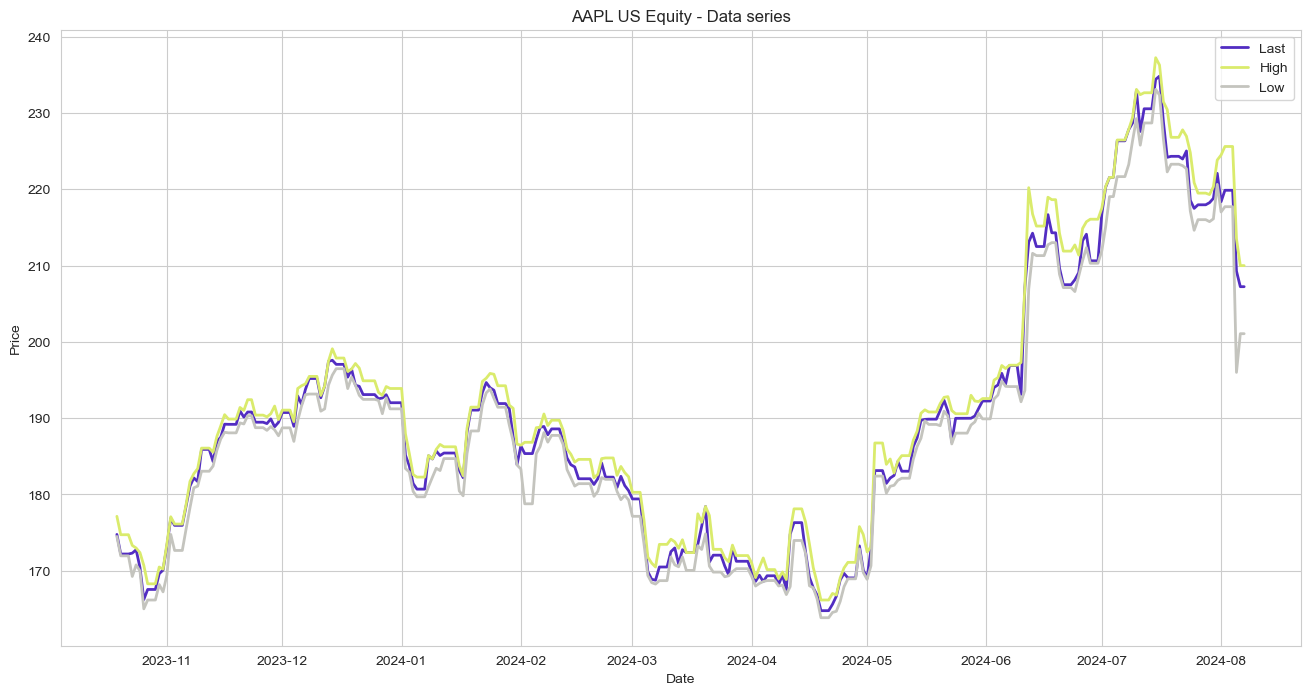

In [65]:
#Virtualization
 
color1 = "#522dc2"
color2 = "#daeb6c"
color3 = "#c4c4be"
 
dfname = tickers
 
#plotting last, high and low
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(df['PX_HIGH'][split_time:], lw=2, c=color2)
plt.plot(df['PX_LOW'][split_time:], lw=2, c=color3)
plt.legend(['Last','High', 'Low'])
 
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

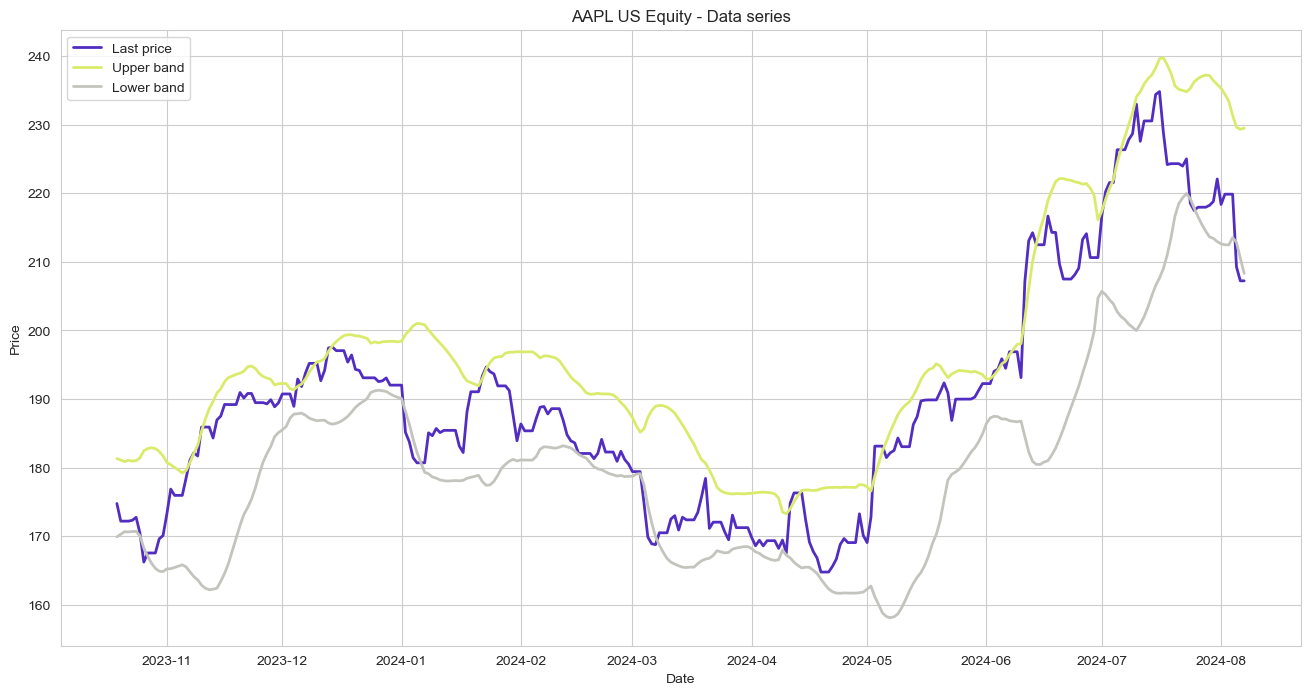

In [66]:
#plotting for last price, upper band and lower band
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(ti_df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(ti_df['upper_band'][split_time:], lw=2, c=color2)
plt.plot(ti_df['lower_band'][split_time:], lw=2, c=color3)
plt.legend(['Last price','Upper band', 'Lower band'])
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

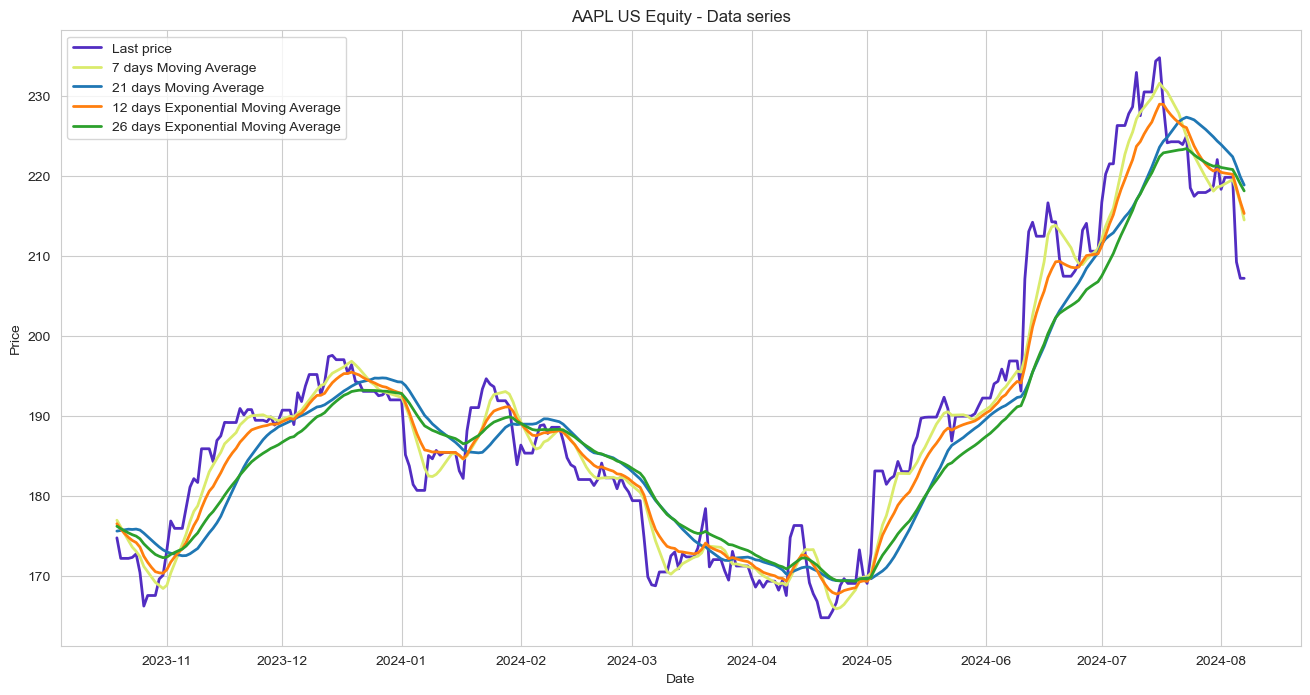

In [67]:
#plotting for Last price","7 days Moving Average","21 days Moving Average","12 days Exponential Moving Average", "26 days Exponential Moving Average
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(ti_df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(ti_df['ma7'][split_time:], lw=2, c=color2)
plt.plot(ti_df['ma21'][split_time:], lw=2)
plt.plot(ti_df['12ema'][split_time:], lw=2 )
plt.plot(ti_df['26ema'][split_time:], lw=2)
 
plt.legend(["Last price","7 days Moving Average","21 days Moving Average","12 days Exponential Moving Average", "26 days Exponential Moving Average"])
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

In [68]:
#Hyperparameter optimisation
def build_lstm_model(hp):
    model = Sequential()
    # Tune the number of units in the first LSTM layer
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    # Tune the number of units in the second LSTM layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(Dropout(0.2))
    # Tune the number of units in the third LSTM layer
    model.add(LSTM(units=hp.Int('units_3', min_value=32, max_value=512, step=32)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mae')
    return model
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,  # The number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='lstm_tuning'
)
 
# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
 
best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 00m 14s]
val_loss: 188.95413208007812

Best val_loss So Far: 188.93728637695312
Total elapsed time: 00h 01m 41s


C:\Users\bs23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\bs23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
def build_gru_model(hp):
    model = Sequential()
    # Tune the number of units in the first GRU layer
    model.add(GRU(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    # Tune the number of units in the second GRU layer
    model.add(GRU(units=hp.Int('units_2', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(Dropout(0.2))
    # Tune the number of units in the third GRU layer
    model.add(GRU(units=hp.Int('units_3', min_value=32, max_value=512, step=32)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mae')
    return model

tuner = kt.RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=10,  # The number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='gru_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]